# TODO
- (argmax, max) per speedup e scalabilita
- qualcosa vs dimensione collezione (n) per vedere la gustafson legge

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
results_df = pd.read_csv("../Statistics/service_time_trial.csv")
results_df.head()

max_nw  active_workers_history  service_time_history  service_time_goal  \
0       8                       1                   114               1000   
1       8                       1                   252               1000   
2       8                       1                   153               1000   
3       8                       1                   222               1000   
4       8                       1                   164               1000   

   emitter_elapsed_time_history  workers_elapsed_time_history  \
0                           573                           241   
1                            19                           254   
2                           260                           148   
3                            15                           226   
4                           171                           161   

   collector_elapsed_time_history  
0                             358  
1                               1  
2                             124  
3                             200  
4                               0

### Service Time History

In [3]:
# plot servive_time_history vs service_time_goal
results_df.plot(y=['service_time_history', 'service_time_goal'],
                style=['-', '--'],
                color=['gray', 'black'])

plt.ylabel('Service Time (microseconds)')
plt.xlabel('Task')
plt.title('Service Time History')
plt.show()

### Service Time Error

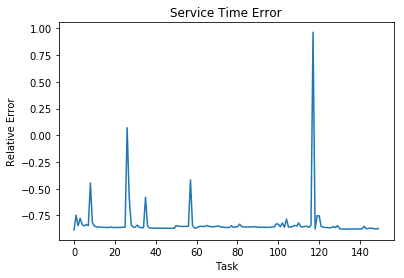

In [4]:
# plot relative error between  service_time_goal and service_time_history
y1 = np.array(results_df['service_time_history'])
y2 = np.array(results_df['service_time_goal'])

relative_error = (y1-y2)/y2

plt.plot(relative_error)
plt.ylabel('Relative Error')
plt.xlabel('Task')
plt.title('Service Time Error')
plt.show()

### Throughput

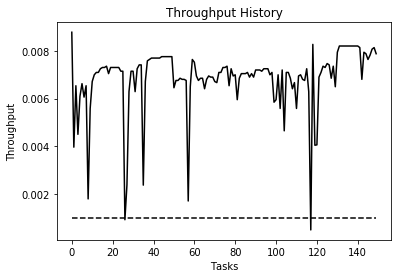

In [13]:
throughput_history = 1/y1
throughtput_goal = 1/y2

plt.plot(throughput_history,'-', color='black', label='throughput history')
plt.plot(throughtput_goal, '--', color='black', label='throughput goal')
plt.xlabel('Tasks')
plt.ylabel('Throughput')
plt.title('Throughput History')
plt.show()

### Parallelism Degree

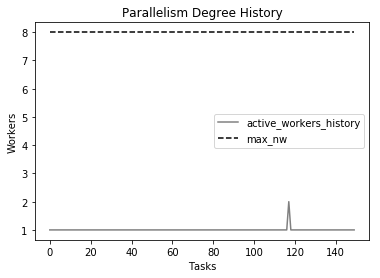

In [70]:
# plot parallelism degree vs max nw
results_df.plot(y=['active_workers_history', 'max_nw'],
                style=['-', '--'],
                color=['gray', 'black'])
plt.ylabel('Workers')
plt.xlabel('Tasks')
plt.title('Parallelism Degree History')
plt.show()

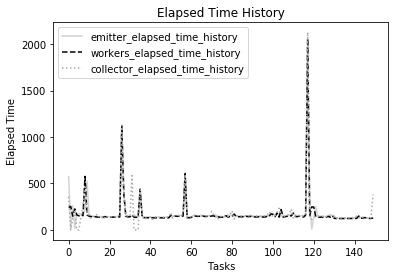

In [71]:
# plot emitter, workers and collector elapsed time history
results_df.plot(y=['emitter_elapsed_time_history','workers_elapsed_time_history','collector_elapsed_time_history'],
                style=['-', '--', ':'],
                color=['lightgray', 'black', 'darkgray'])
plt.ylabel('Elapsed Time')
plt.xlabel('Tasks')
plt.title('Elapsed Time History')
plt.show()

### Completion Time

In [72]:
tc_vs_nw_df = pd.read_csv('../Statistics/completion_time_vs_nw.csv')
tc_vs_nw_df.head()

nw  completion_time
0   1            24760
1   2             9521
2   3             8821
3   4             5500
4   5             5038

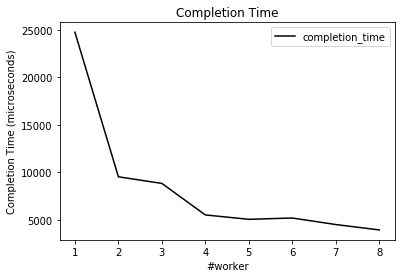

In [73]:
tc_vs_nw_df.plot(x='nw', y='completion_time', style='-', color='black')
plt.xlabel('#worker')
plt.ylabel('Completion Time (microseconds)')
plt.title('Completion Time')
plt.show()

In [74]:
print("min completion time:", np.min(tc_vs_nw_df['completion_time']), 
      "obtained with", np.argmin(tc_vs_nw_df['completion_time'])+1, "workers")

min completion time: 3921 obtained with 8 workers


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


### Scalability

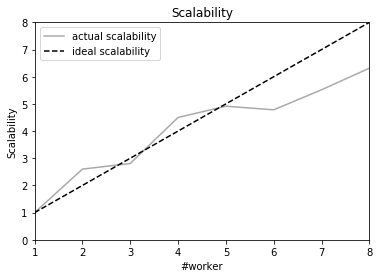

In [75]:
# scalability
tc = tc_vs_nw_df['completion_time']
nw = tc_vs_nw_df['nw']

scalability = [tc[0]/float(t) for t in tc]

plt.plot(nw, scalability, linestyle='-', label='actual scalability', color='darkgray')
plt.plot(nw, nw, linestyle='--', label='ideal scalability', color='black')
plt.legend(loc='best')
plt.xlabel('#worker')
plt.ylabel('Scalability')
plt.ylim([0, np.max(nw)])
plt.xlim([1, np.max(nw)])
plt.title('Scalability')
plt.show()

In [76]:
n_worker, max_scalability = np.argmax(scalability), np.max(scalability)
print("max scalability:", round(max_scalability,4), "obtained with", n_worker+1, "workers")

max scalability: 6.3147 obtained with 8 workers


### Speedup

In [77]:
# speedup
sequential_time = pd.read_csv('../Statistics/sequential_time.csv')
sequential_time

sequential_time
0            15007

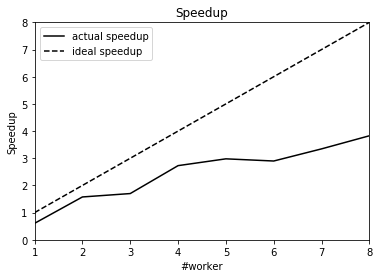

In [78]:
tseq = sequential_time['sequential_time']
speedup = [tseq/float(t) for t in tc]

plt.plot(nw, speedup, linestyle='-', label='actual speedup', color='black')
plt.plot(nw, nw, linestyle='--', label='ideal speedup', color='black')
plt.legend(loc='best')
plt.xlabel('#worker')
plt.ylabel('Speedup')
plt.ylim([0, np.max(nw)])
plt.xlim([1, np.max(nw)])
plt.title('Speedup')
plt.show()

In [79]:
n_worker, max_speedup = np.argmax(speedup), np.max(speedup)
print("max speedup:", round(max_speedup,4), "obtained with", n_worker+1, "workers")

max speedup: 3.8273 obtained with 8 workers


### Efficiency

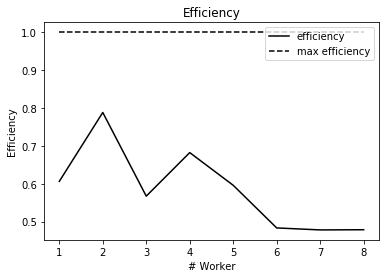

In [80]:
efficiency = [ sp/float(n) for n, sp in zip(nw, speedup)]
plt.hlines(1, 1, max(nw), linestyle='--', label='max efficiency')
plt.plot(nw, efficiency, color='black', label='efficiency')
plt.xlabel('# Worker')
plt.ylabel('Efficiency')
plt.title('Efficiency')
plt.legend(loc='best')
plt.show()

In [81]:
print("max efficiency:", np.max(efficiency), "with nw=", np.argmax(efficiency)+1)
print("min efficiency:", np.min(efficiency), "with nw=", np.argmin(efficiency)+1)

max efficiency: 0.7880999894969016 with nw= 2
min efficiency: 0.47789949684733457 with nw= 7


### Alpha
- colonna 1: alpha
- colonna 2: ts_goal
- colonna 3-fine: service_time_history

In [82]:
ts_vs_alpha_df = pd.read_csv("../Statistics/service_time_history_vs_alpha.csv", header=None)
ts_vs_alpha_df.head()

0     1    2    3    4    5    6    7    8    9   ...   142  143  144  \
0  0.05  1000    2   10   14   18   22   26   30   33 ...   115  114  113   
1  0.10  1000    5   21   29   37   44   50   55   60 ...   105  105  105   
2  0.15  1000    8   30   41   66   72   77   81   84 ...   121  118  116   
3  0.20  1000   11   40   53   64   72   79   85   89 ...   108  107  107   
4  0.25  1000   13   48   63   74   82   89   94   97 ...   105  105  105   

   145  146  147  148  149  150  151  
0  112  111  110  109  108  107  107  
1  105  105  105  105  105  105  105  
2  114  112  111  110  109  108  108  
3  107  107  107  107  107  107  107  
4  105  105  105  105  105  105  105  

[5 rows x 152 columns]

- prova per n differenti

[]

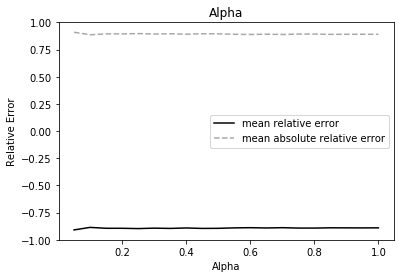

In [83]:
#ts_vs_alpha_df.loc[0, 1:]
alpha_values = ts_vs_alpha_df.loc[:,0]
ts_goal = ts_vs_alpha_df.loc[0,1]

ts_histories = np.array(ts_vs_alpha_df.loc[:, 2:])
n_alpha, n_tasks = ts_histories.shape

ts_goal = np.full((n_tasks),ts_goal)

rel_errors = np.array([(ts - ts_goal)/ts_goal for ts in ts_histories])

mean_rel_error = np.mean(rel_errors, 1)
mean_abs_rel_error = np.mean(np.abs(rel_errors), 1)

plt.plot(alpha_values, mean_rel_error, label='mean relative error', linestyle='-', color='black')
plt.plot(alpha_values, mean_abs_rel_error, label='mean absolute relative error', linestyle='--', color='darkgray')
plt.legend(loc='best')
plt.xlabel('Alpha')
plt.ylabel('Relative Error')
plt.title('Alpha')
plt.plot()

In [84]:
print("min rel error:", round(np.min(mean_rel_error),4), "obtained with alpha:", alpha_values[np.argmin(mean_rel_error)])
print("min abs rel error:", round(np.min(mean_abs_rel_error),4), "obtained with alpha:", alpha_values[np.argmin(mean_abs_rel_error)])

min rel error: -0.9101 obtained with alpha: 0.05
min abs rel error: 0.8869 obtained with alpha: 0.1


### Max speedup / scalability vs task size

In [85]:
# load task_size vs sequential_time 
task_size_vs_tseq_df = pd.read_csv('../Statistics/task_size_vs_sequential_time.csv')
task_size_vs_tseq_df.head()

task_sizes = task_size_vs_tseq_df['task_size']
sequential_times = task_size_vs_tseq_df['sequential_time']
task_size_vs_tseq_df.head()

task_size  sequential_time
0       1000           150011
1       2000           300011
2       3000           450011
3       4000           600023
4       5000           750039

In [86]:
# load completion_time vs nw for each task size
tc_vs_nw_df_list = []
for task_size in task_sizes:
    df = pd.read_csv('../Statistics/TaskSize/completion_time_vs_nw_task_size_' + 
                     str(task_size) + '.csv')
    tc_vs_nw_df_list.append(df)

tc_vs_nw_df_list[0].head()

nw  completion_time
0   1           151595
1   2            78950
2   3            51121
3   4            48365
4   5            39381

In [87]:
max_speedups = []
max_scalabilities = []

for i in range(len(tc_vs_nw_df_list)):
    tseq = sequential_times[i]
    tc_list = df['completion_time']
    speedup = [tseq/float(tc) for tc in tc_list]
    scalability = [tc_list[0]/float(tc) for tc in tc_list]
    
    max_speedups.append(np.max(speedup))
    max_scalabilities.append(np.max(scalability))

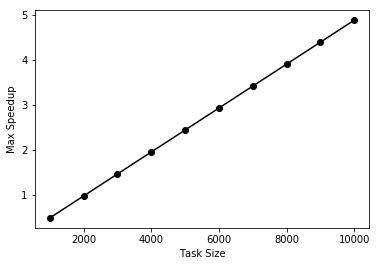

In [88]:
plt.plot(task_sizes, max_speedups, 'o-', color='black', label='max speedup')
#plt.plot(task_sizes, max_scalabilities, 'x-', color='grey', label='max scalability')
plt.ylabel('Max Speedup')
plt.xlabel('Task Size')
plt.show()

### Max Speedup / Scalability vs Collection Size

In [89]:
# load coll_size vs sequential_time 
coll_size_vs_tseq_df = pd.read_csv('../Statistics/collection_size_vs_sequential_time.csv')
coll_size_vs_tseq_df.head()

coll_sizes = coll_size_vs_tseq_df['collection_size']
sequential_times = coll_size_vs_tseq_df['sequential_time']
coll_size_vs_tseq_df.head()

collection_size  sequential_time
0              300            30048
1              600            60047
2              900            90096
3             1200           120091
4             1500           150134

In [90]:
# load completion_time vs nw for each coll size
tc_vs_nw_df_list = []
for coll_size in coll_sizes:
    df = pd.read_csv('../Statistics/CollSize/completion_time_vs_nw_coll_size_' + 
                     str(coll_size) + '.csv')
    tc_vs_nw_df_list.append(df)

tc_vs_nw_df_list[0].head()

nw  completion_time
0   1            33573
1   2            16537
2   3            11306
3   4             9668
4   5             9556

In [91]:
max_speedups = []
max_scalabilities = []

for i in range(len(tc_vs_nw_df_list)):
    tseq = sequential_times[i]
    tc_list = df['completion_time']
    speedup = [tseq/float(tc) for tc in tc_list]
    scalability = [tc_list[0]/float(tc) for tc in tc_list]
    
    max_speedups.append(np.max(speedup))
    max_scalabilities.append(np.max(scalability))

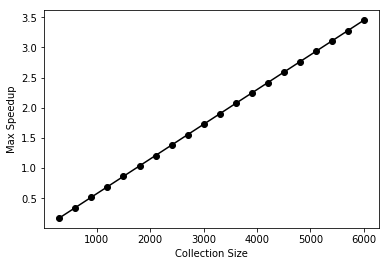

In [92]:
plt.plot(coll_sizes, max_speedups, 'o-', color='black', label='max speedup')
#plt.plot(coll_sizes, max_scalabilities, 'x-', color='grey', label='max scalability')
plt.ylabel('Max Speedup')
plt.xlabel('Collection Size')
plt.show()